In [1]:
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris #save data information as variable
iris = load_iris()#view data description and information
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
#make sure to save the data frame to a variable
data = pd.DataFrame(iris.data)
data.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
#put target data into data frame
target = pd.DataFrame(iris.target)
#Lets rename the column so that we know that these values refer to the target values
target = target.rename(columns = {0: 'target'})
target.head()

,target
0,0
1,0
2,0
3,0
4,0


The target data frame is only one column, and it gives a list of the values 0, 1, and 2. We will use the information from the feature data to predict if a flower belongs in group 0, 1, or 2. But what do these numbers refer to?

* 0 is Iris Setosa
* 1 is Iris Versicolour
* 2 is Iris Virginica

In [7]:
df = pd.concat([data, target], axis = 1)
#in the code above, axis = 1 tells the data frame to add the target data frame as another column of the data frame, 
#axis = 0 would add the values as another row on the bottom
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
# Look at Data Types
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target            int32
dtype: object

In [9]:
# Check for missing values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Visualizing

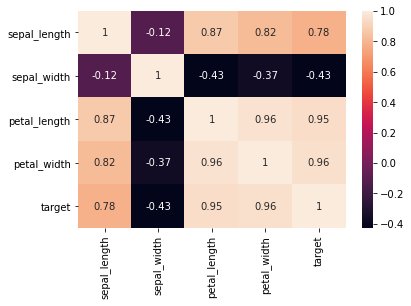

In [11]:
#Correlations
sns.heatmap(df.corr(), annot = True);
#annot = True adds the numbers onto the squares

### Observations

* Petal length and width is most correlated with the target, meaning that as these numbers increase, so does the target value. 
* In this case, it means that flowers in class 2 often have longer petal length and width than flowers in class 0. 
* Sepal width is most anti-correlated, indicating that flowers in class 0 have the greatest sepal width than those in class 2. 
* We can also see some intercorrelation between features, for example petal width and length are also highly correlated. 
* This information is not necessarily the best way to analyze the data, but it allows us to start seeing these relationships.

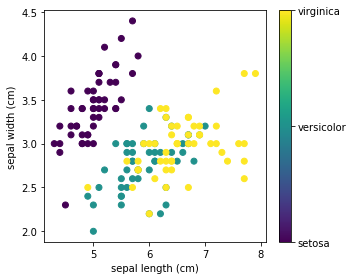

In [12]:
# Scatter plot
# The indices of the features that we are plotting (class 0 & 1)
x_index = 0
y_index = 1
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.tight_layout()
plt.show()

Relationship between sepal width and length between the three classes of flowers. Virginica and versica look to be relatively similar in sepal size, but setosa has created its own cluster to the left.

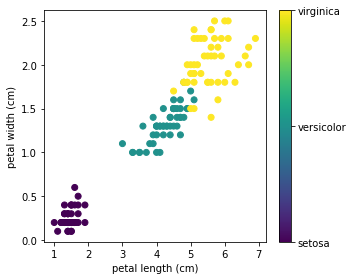

In [13]:
x_index = 2
y_index = 3
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.figure(figsize=(5, 4))

plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.tight_layout()
plt.show()

Visualizing the relationship between petal length and width. We can see that the flowers are starting to cluster individually, and elements related to petal size may be a strong determinate of class.

# Create a model

In [14]:
# Divide our data into predictors (X) and target values (y)
X = df.copy()
y = X.pop('target')

In [15]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=1)

# Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
RF=RandomForestClassifier()

#Train the model using the training sets 
RF.fit(X_train,y_train)

# prediction on test set
y_pred=RF.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

#create the model instance
LR = LogisticRegression()

#fit the model on the training data
LR.fit(X_train, y_train)

#prediction on test set
y_pred=LR.predict(X_test)

#the score, or accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


In [18]:
Prediction = RF.predict([[5.1,3.5,1.4,0.2]])[0]
print(iris.target_names[Prediction])
print("Prediction of Species: {}".format(Prediction))

setosa
Prediction of Species: 0


In [19]:
Prediction = LR.predict([[5.1,3.5,1.4,0.2]])[0]
print(iris.target_names[Prediction])
print("Prediction of Species: {}".format(Prediction))

setosa
Prediction of Species: 0


*Both Random Forest Classifer model and Logistic Regressor model have predicted the accurate species*